<a href="https://colab.research.google.com/github/Chediak/common-master-ai/blob/main/neogrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ace_tools

RMSE (Root Mean Square Error): 9.617910185114617e-14


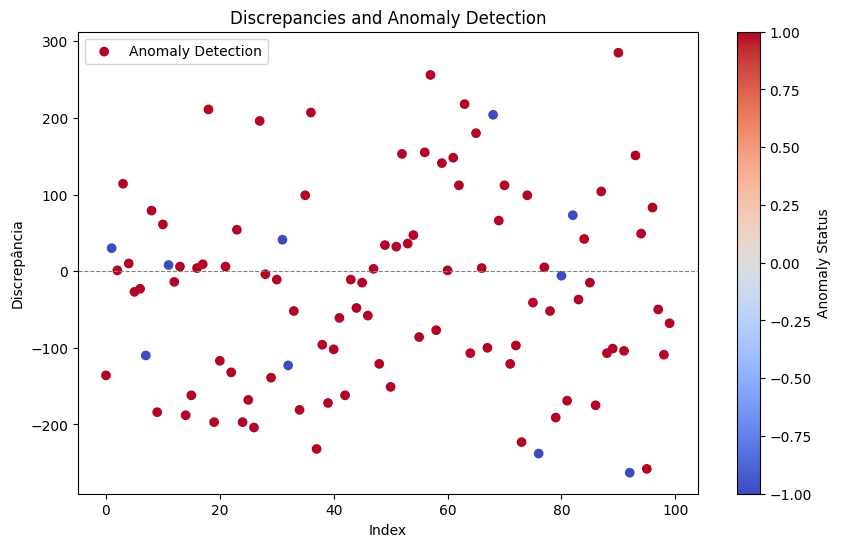

    Canal Holding Investigação  Inventário Inicial  Sell In  Sell Out  \
0  DIS VI          DISTRIB RIO                 240      349       213   
1  DIS VI          DISTRIB RIO                 200      464       494   
2  DIS VI          DISTRIB RIO                 273      355       356   
3  DIS VI          DISTRIB RIO                 224      322       436   
4  DIS VI          DISTRIB RIO                 264      302       312   
5  DIS VI          DISTRIB RIO                 367      388       361   
6  DIS VI          DISTRIB RIO                 249      444       421   
7  DIS VI          DISTRIB RIO                 201      398       288   
8  DIS VI          DISTRIB RIO                 302      282       361   
9  DIS VI          DISTRIB RIO                 280      433       249   

   Discrepância  Anomaly  
0          -136        1  
1            30       -1  
2             1        1  
3           114        1  
4            10        1  
5           -27        1  
6      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simulating the dataset based on the provided structure
data = {
    "Canal": ["DIS VI"] * 100,
    "Holding Investigação": ["DISTRIB RIO"] * 100,
    "Inventário Inicial": np.random.randint(200, 500, 100),
    "Sell In": np.random.randint(200, 500, 100),
    "Sell Out": np.random.randint(200, 500, 100),
    "Inventário Rolado": np.random.randint(200, 500, 100),
    "Inventário Inf. Rolado": np.random.randint(200, 500, 100),
}

df = pd.DataFrame(data)

# Creating a discrepancy feature
df["Discrepância"] = df["Sell Out"] - df["Sell In"]

# Splitting the dataset into features and target
X = df[["Inventário Inicial", "Sell In", "Sell Out", "Inventário Rolado", "Inventário Inf. Rolado"]]
y = df["Discrepância"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
errors = y_test - y_pred
rmse = np.sqrt(np.mean(errors**2))

# Printing RMSE
print(f"RMSE (Root Mean Square Error): {rmse}")

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X)

# Visualizing the discrepancies and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Discrepância"], c=df["Anomaly"], cmap='coolwarm', label='Anomaly Detection')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Discrepancies and Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Discrepância")
plt.colorbar(label="Anomaly Status")
plt.legend()
plt.show()

# Displaying a sample of the data
df_sample = df[["Canal", "Holding Investigação", "Inventário Inicial", "Sell In", "Sell Out", "Discrepância", "Anomaly"]]
print(df_sample.head(10))

RMSE do modelo de previsão de Crescimento: 1.60


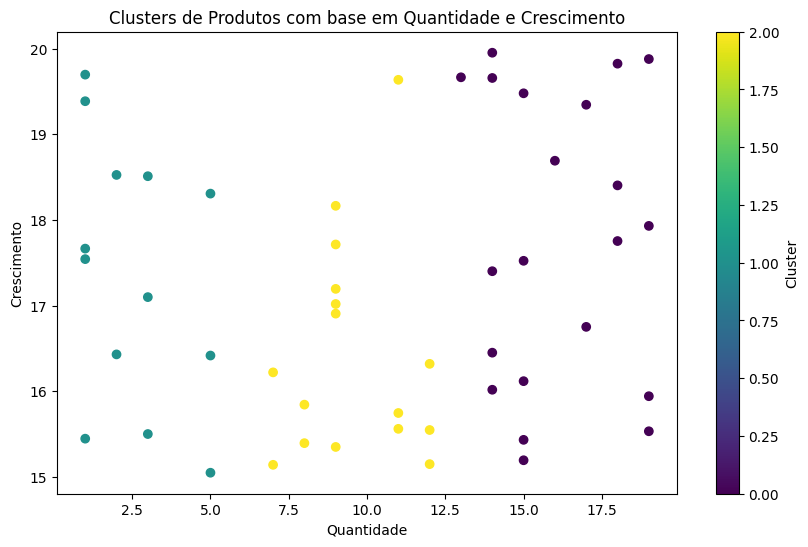

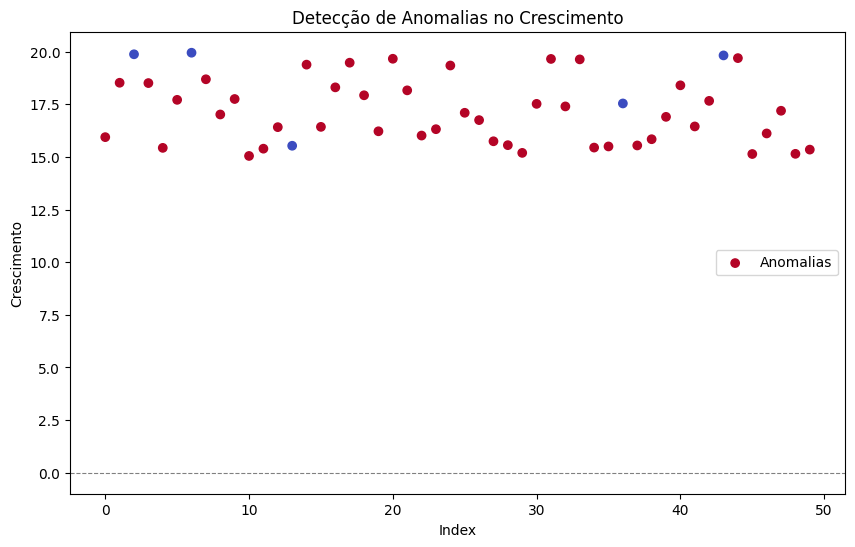

   Codigo_Barras  Quantidade  Preco_Unitario  Preco_Medio  Crescimento  \
0  7622210571805          19       15.355469     0.827096    15.942045   
1  7622210571805           2       15.930052     0.889483    18.525584   
2  7622210571805          19       17.411892     0.995723    19.878525   
3  7622210571805           3       11.791461     0.934294    18.510722   
4  7622210571805          15       16.145722     0.932371    15.432490   
5  7622210571805           9       10.899844     0.813482    17.713712   
6  7622210571805          14       19.770992     0.960144    19.952332   
7  7622210571805          16       10.936727     0.891611    18.691258   
8  7622210571805           9       17.535681     0.923803    17.018514   
9  7622210571805          18       16.655593     0.876143    17.753673   

   Proporcao_Preco_Quantidade  Diferenca_Preco  Anomalia  Cluster  
0                    0.808183       -14.528373         1        0  
1                    7.965026       -15.040569   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulando dados com base na tabela da imagem
data = {
    "Codigo_Barras": [7622210571805] * 50,
    "Quantidade": np.random.randint(1, 20, 50),
    "Preco_Unitario": np.random.uniform(10, 20, 50),
    "Preco_Medio": np.random.uniform(0.8, 1.0, 50),
    "Crescimento": np.random.uniform(15, 20, 50)
}

df = pd.DataFrame(data)

# Criando novas métricas
df["Proporcao_Preco_Quantidade"] = df["Preco_Unitario"] / df["Quantidade"]
df["Diferenca_Preco"] = df["Preco_Medio"] - df["Preco_Unitario"]

# Detecção de Anomalias com Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Preco_Medio", "Crescimento"]])

# Previsão de Crescimento com Regressão Linear
X = df[["Quantidade", "Preco_Unitario", "Preco_Medio", "Proporcao_Preco_Quantidade", "Diferenca_Preco"]]
y = df["Crescimento"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE do modelo de previsão de Crescimento: {rmse:.2f}")

# Clustering com K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Quantidade", "Preco_Unitario", "Crescimento"]])

# Visualizando clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Quantidade"], df["Crescimento"], c=df["Cluster"], cmap='viridis')
plt.title("Clusters de Produtos com base em Quantidade e Crescimento")
plt.xlabel("Quantidade")
plt.ylabel("Crescimento")
plt.colorbar(label="Cluster")
plt.show()

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Crescimento"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Crescimento")
plt.xlabel("Index")
plt.ylabel("Crescimento")
plt.legend()
plt.show()

# Exibindo a tabela com anomalias e clusters
print(df.head(10))


RMSE do modelo de previsão de Quantidade: 5.82


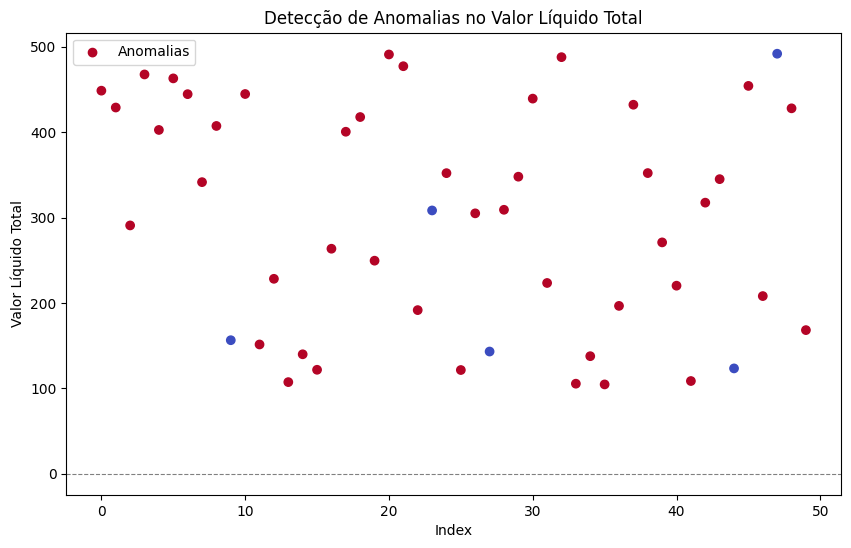

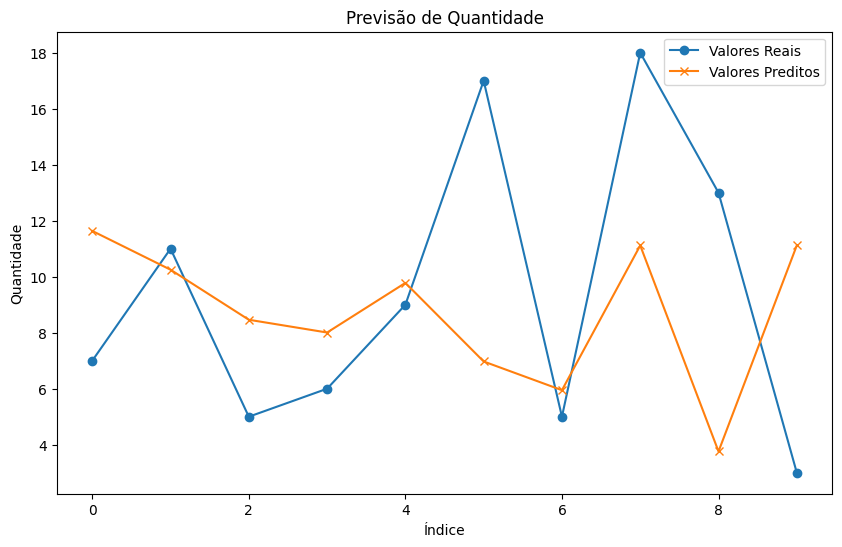

  Data_Transacao  Codigo_Barras  Quantidade  Preco_Unitario  \
0     2024-11-01  7622210571805          17       11.954127   
1     2024-11-02  7622210571805           1       18.958731   
2     2024-11-03  7622210571805           9       10.807503   
3     2024-11-04  7622210571805           3       17.217259   
4     2024-11-05  7622210571805           4       19.385807   
5     2024-11-06  7622210571805           4       17.289466   
6     2024-11-07  7622210571805           2       17.443568   
7     2024-11-08  7622210571805          10       17.620764   
8     2024-11-09  7622210571805          16       19.466712   
9     2024-11-10  7622210571805           1       13.699588   

   Valor_Liquido_Total  Fator_Conversao  Preco_Unitario_Calculado  Anomalia  
0           448.648678         1.180088                 26.391099         1  
1           428.913583         0.968664                428.913583         1  
2           290.817536         1.033266                 32.313060       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulando os dados extraídos do SQL
data = {
    "Data_Transacao": pd.date_range(start="2024-11-01", periods=50, freq="D"),
    "Codigo_Barras": [7622210571805] * 50,
    "Quantidade": np.random.randint(1, 20, 50),
    "Preco_Unitario": np.random.uniform(10, 20, 50),
    "Valor_Liquido_Total": np.random.uniform(100, 500, 50),
    "Fator_Conversao": np.random.uniform(0.8, 1.2, 50)
}

df = pd.DataFrame(data)

# Calculando métricas derivadas
df["Preco_Unitario_Calculado"] = df["Valor_Liquido_Total"] / df["Quantidade"]

# Detecção de Anomalias
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Valor_Liquido_Total"]])

# Análise Preditiva (Regressão Linear para prever `Quantidade`)
X = df[["Preco_Unitario", "Fator_Conversao", "Valor_Liquido_Total"]]
y = df["Quantidade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE do modelo de previsão de Quantidade: {rmse:.2f}")

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Valor_Liquido_Total"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Valor Líquido Total")
plt.xlabel("Index")
plt.ylabel("Valor Líquido Total")
plt.legend()
plt.show()

# Visualizando os dados previstos vs reais
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores Reais", marker='o')
plt.plot(y_pred, label="Valores Preditos", marker='x')
plt.title("Previsão de Quantidade")
plt.xlabel("Índice")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

# Exibindo a tabela com anomalias
print(df.head(10))

RMSE para prever Valor Líquido Total: 130.87


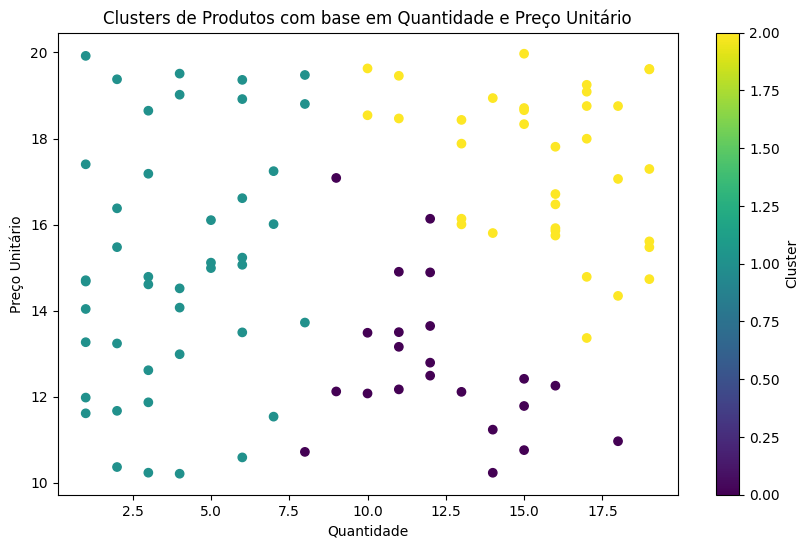

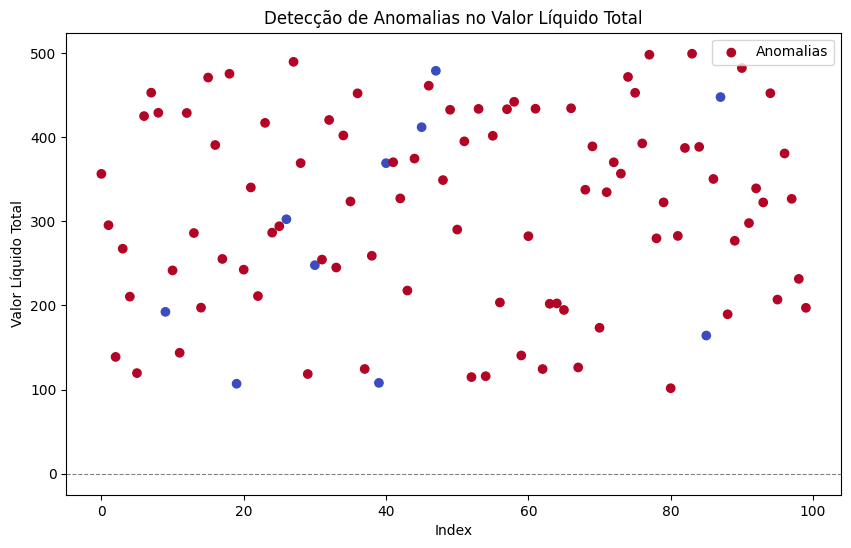

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simulando dados do SQL
data = {
    "Codigo_Barras": [7622210571805] * 100,
    "Quantidade": np.random.randint(1, 20, 100),
    "Preco_Unitario": np.random.uniform(10, 20, 100),
    "Valor_Liquido_Total": np.random.uniform(100, 500, 100),
    "Fator_Conversao": np.random.uniform(0.8, 1.2, 100)
}
df = pd.DataFrame(data)

# Criando métricas adicionais
df["Preco_Unitario_Calculado"] = df["Valor_Liquido_Total"] / df["Quantidade"]

# Divisão de dados para treinamento e teste
X = df[["Quantidade", "Preco_Unitario", "Fator_Conversao"]]
y = df["Valor_Liquido_Total"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Preditivo - Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliando o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE para prever Valor Líquido Total: {rmse:.2f}")

# Detecção de Anomalias com Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Fator_Conversao"]])

# Clustering para Segmentação
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Quantidade", "Preco_Unitario", "Fator_Conversao"]])

# Visualizando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Quantidade"], df["Preco_Unitario"], c=df["Cluster"], cmap='viridis')
plt.title("Clusters de Produtos com base em Quantidade e Preço Unitário")
plt.xlabel("Quantidade")
plt.ylabel("Preço Unitário")
plt.colorbar(label="Cluster")
plt.show()

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Valor_Liquido_Total"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Valor Líquido Total")
plt.xlabel("Index")
plt.ylabel("Valor Líquido Total")
plt.legend()
plt.show()